In [2]:
%matplotlib inline
import GPy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.lines as mlines

GPy.plotting.change_plotting_library('matplotlib')


In [3]:
kern1 = GPy.kern.RBF(input_dim=3, variance=100, lengthscale=1000)#**GPy.kern.Coregionalize(1,output_dim=3, rank=1)
kern2 = GPy.kern.RBF(input_dim=3, variance=100, lengthscale=1000)#**GPy.kern.Coregionalize(1,output_dim=3, rank=1)
kern3 = GPy.kern.RBF(3,variance=100,ARD=True,lengthscale=[10,1000,1000])
display(kern3)


rbf.,value,constraints,priors
variance,100.0,+ve,
lengthscale,"(3,)",+ve,


In [4]:
vel = np.loadtxt('hornsrev_data_VxVy.txt')
inp = np.loadtxt('hornsrev_data_alphaxy.txt')
train=np.loadtxt('hornsrev_data_all_even.txt')
validate=np.loadtxt('hornsrev_data_all_odd.txt')
#Y1 = np.array(vel[:,0])
Y1 = np.array(train[:,3])
Y1 = Y1[:,None]
#print Y1
#Y2 = np.array(vel[:,1])
Y2 = np.array(train[:,4])
Y2 = Y2[:,None]
Ymag=np.sqrt(np.square(Y2)+np.square(Y1))
X = np.array(train[:,0:3])
#X1 = np.array(inp[:,1])
#X2 = np.array(inp[:,2])
#X = np.transpose(X)
#print X

xval=np.array(validate[:,0:3])
y1val=np.array(validate[:,3:4])
y2val=np.array(validate[:,4:5])
ymagval=np.sqrt(np.square(y1val)+np.square(y2val))
xval=xval-X.mean(axis=0, keepdims=True)
X = X-X.mean(axis=0, keepdims=True)
X

array([[  -16.    , -2727.2375,  1952.375 ],
       [  -16.    , -2668.2375,  1394.375 ],
       [  -16.    , -2609.2375,   836.375 ],
       ..., 
       [   16.    ,  2610.7625,  -836.625 ],
       [   16.    ,  2669.7625, -1394.625 ],
       [   16.    ,  2729.7625, -1951.625 ]])

In [5]:
#model1 = GPy.models.GPRegression(X, Y1, kern1)
#model1.optimize(messages=True)
#display(model1)

#model2 = GPy.models.GPRegression(X, Y2, kern2)
#model2.optimize(messages=True)
#display(model2)

modelmag=GPy.models.GPRegression(X, Ymag, kern3)
modelmag.optimize(messages=True)
display(modelmag)


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0000   1.734130e+03           nan 

 C:\Users\nedim\Anaconda\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


    04s58  0006   2.258157e+02   1.581410e+04 
    10s36  0014   1.322832e+02   4.133747e+00 
    21s90  0030   5.027285e+02   5.200839e+05 
    30s37  0042  -9.248202e+01   6.085942e+00 
    36s02  0050  -1.045265e+02   5.628808e+01 
    50s04  0070  -1.076516e+02   1.035475e-01 
    55s12  0077  -1.076554e+02   3.477722e-10 
Runtime:     55s12
Optimization status: Converged



GP_regression.,value,constraints,priors
rbf.variance,16.0926442255,+ve,
rbf.lengthscale,"(3,)",+ve,
Gaussian_noise.variance,0.0106476200147,+ve,


  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                     5.45248181  |      +ve      |        
  [1]    |                  1181.95606099  |      +ve      |        
  [2]    |                  1030.71396293  |      +ve      |        


 C:\Users\nedim\Anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


 C:\Users\nedim\Anaconda\lib\site-packages\matplotlib\figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


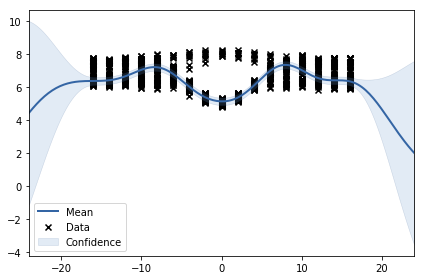

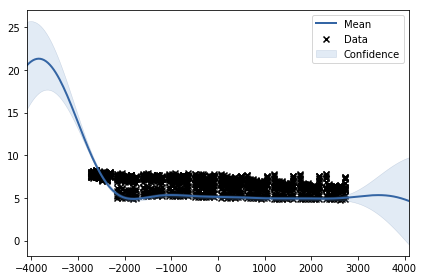

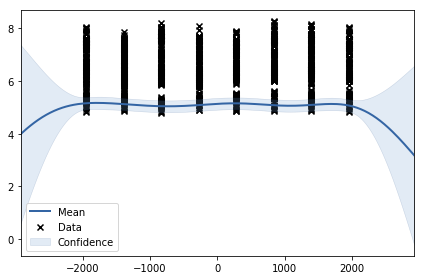

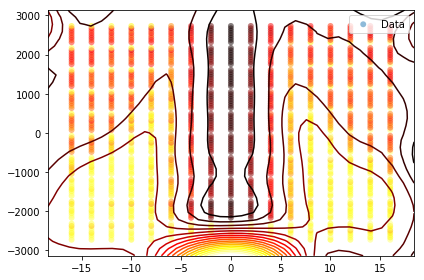

In [6]:
print (modelmag.rbf.lengthscale)
for i in range(3):
    modelmag.plot(visible_dims=[i])
    
modelmag.plot(visible_dims=[0,1])

In [7]:
calc,var=modelmag.predict(X)
np.sqrt(np.mean(np.square(calc-Ymag)))
print (var)

[[0.01957262]
 [0.01809267]
 [0.01730824]
 ...
 [0.01731301]
 [0.01808851]
 [0.01957434]]


In [8]:
xt1=np.arange(-16,16.1,.1)
xt1=np.column_stack([xt1,-2492.2375*np.ones(len(xt1)),-278.625*np.ones(len(xt1))])
vel,velvar=modelmag.predict(xt1)

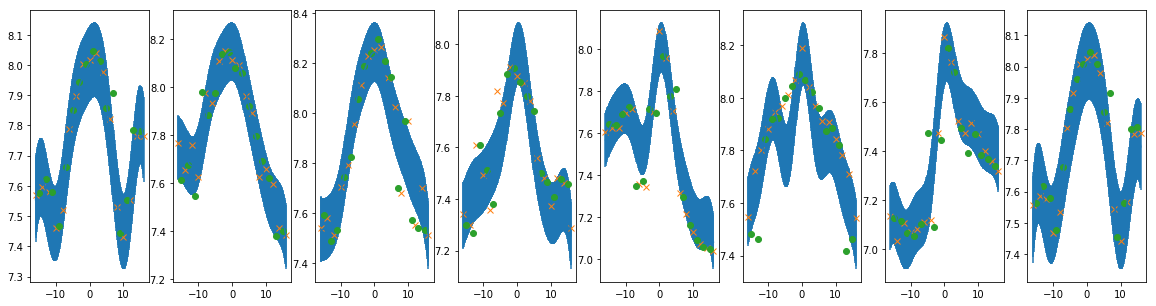

In [95]:
angles=np.arange(-16,16.1,.1)
plt.figure(1,figsize=(20,5 ))
for i in range(8):
    plt.subplot(1,8,i+1)
    xc=X[i,1]
    yc=X[i,2]
    tur=np.column_stack([angles,xc*np.ones(len(angles)),yc*np.ones(len(angles))])
    vel,velvar=modelmag.predict(tur)
    plt.errorbar(tur[:,0],vel,np.sqrt(velvar))
    plt.plot(X[i::80,0],Ymag[i::80],"x")
    plt.plot(xval[i::80,0],ymagval[i::80],"o")
    plt.show
    

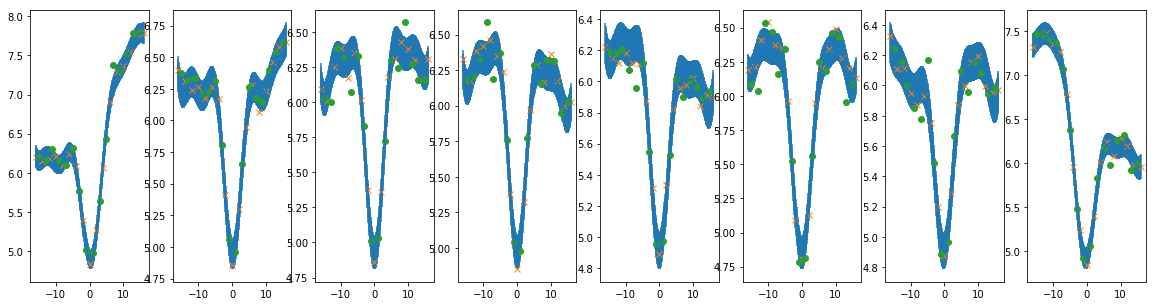

In [94]:
angles=np.arange(-16,16.1,.1)
plt.figure(1,figsize=(20,5 ))
for i in range(72,80):
    plt.subplot(1,8,i+1-72)
    xc=X[i,1]
    yc=X[i,2]
    tur=np.column_stack([angles,xc*np.ones(len(angles)),yc*np.ones(len(angles))])
    vel,velvar=modelmag.predict(tur)
    plt.errorbar(tur[:,0],vel,np.sqrt(velvar))
    plt.plot(X[i::80,0],Ymag[i::80],"x")
    plt.plot(xval[i::80,0],ymagval[i::80],"o")
    plt.show
    